#### MULTIPLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.shape

(1436, 11)

In [4]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


The given dataset contains 10 numerical columns and 1 categorical column. and it contains 1436 rows.

#### Taskes:
##### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


By looking at the above statictics we have say that,

* The Price,KM and cc columns are having hight standard deviation and also the high mean values.
* Column Price has it's mean (10730.824513) has large variabtion with minimum and maximum value so the data could be right skewed.
* Cylinder column has standard deviation of 0 and other values are almost same so we can say that the distribution of the data lies around 4.
* The Automatic column consists of very low standard deviation.

In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

The dataset does not contians null values

In [8]:
df.duplicated().sum()

1

In [9]:
# Sepearting the numerical and categorical columns are further analysis and visulaization.
num_col=[i for i in df.columns if df[i].dtype!='O']
obj_col=[i for i in df.columns if df[i].dtype=='O']
num_col,obj_col

(['Price',
  'Age_08_04',
  'KM',
  'HP',
  'Automatic',
  'cc',
  'Doors',
  'Cylinders',
  'Gears',
  'Weight'],
 ['Fuel_Type'])

Fule_Type is the only one categorical column present in the given dataset, the rest of all the columns are numerical

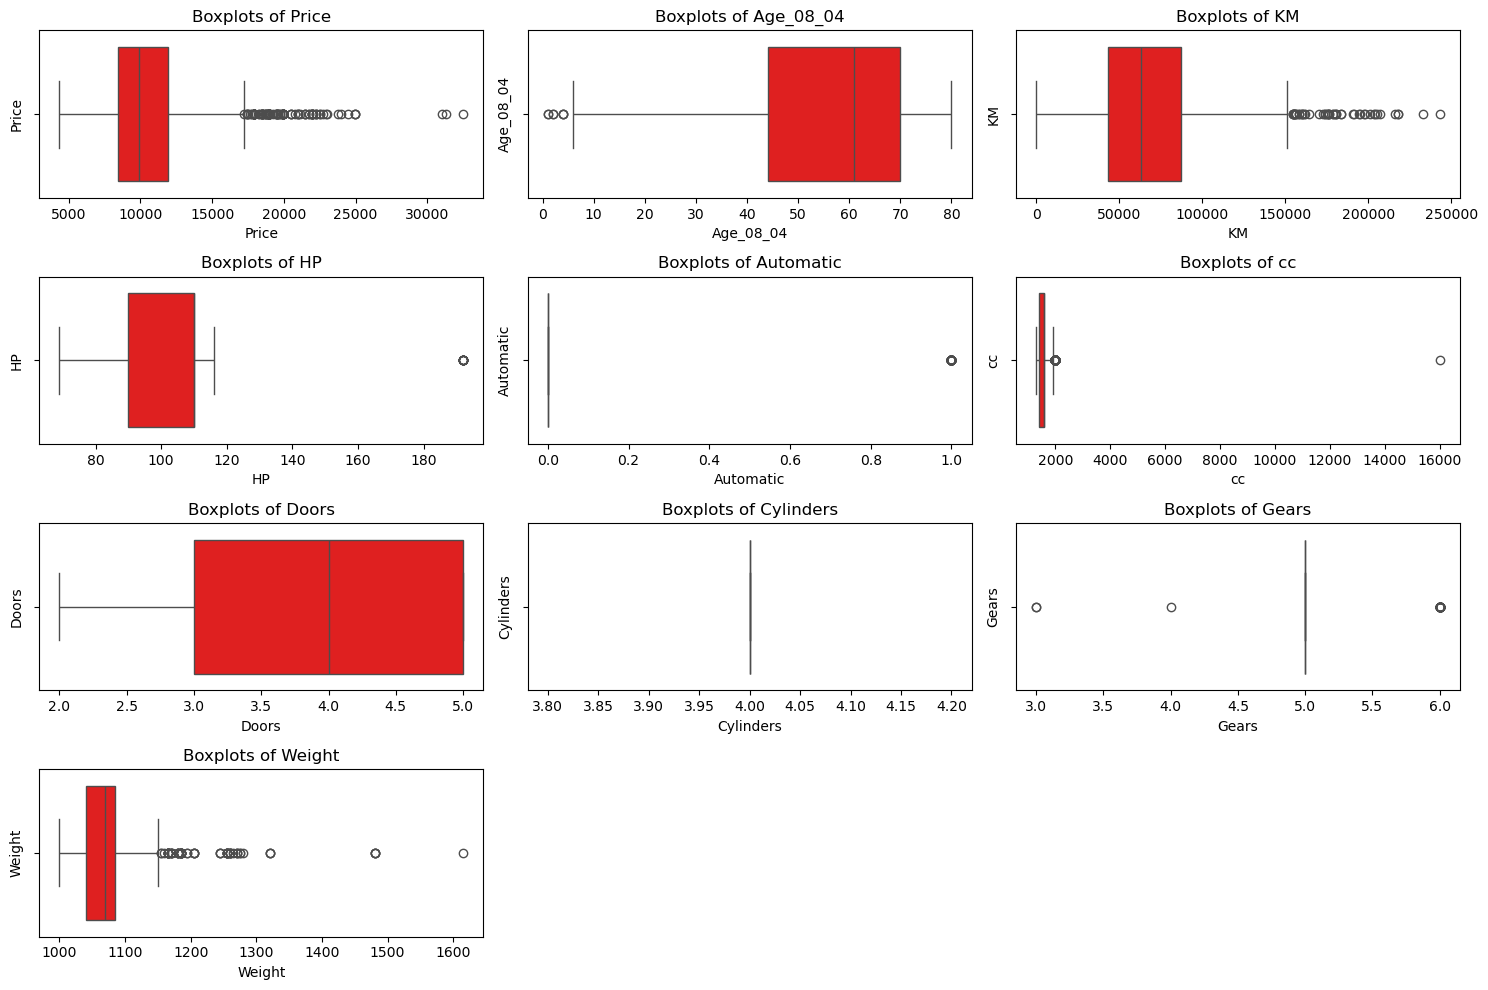

In [10]:
# Ploting the box plots to detect the outliers
plt.figure(figsize=(15,10))
index=1
for col in num_col:
    plt.subplot(4,3,index)
    sns.boxplot(x=df[col],color='red')
    plt.title(f'Boxplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

By the above boxplots ,we can conclude that ,few columns contians outliers like KM,Weight etc. We can treat the outliers further.

We have considerd Price as our target column.

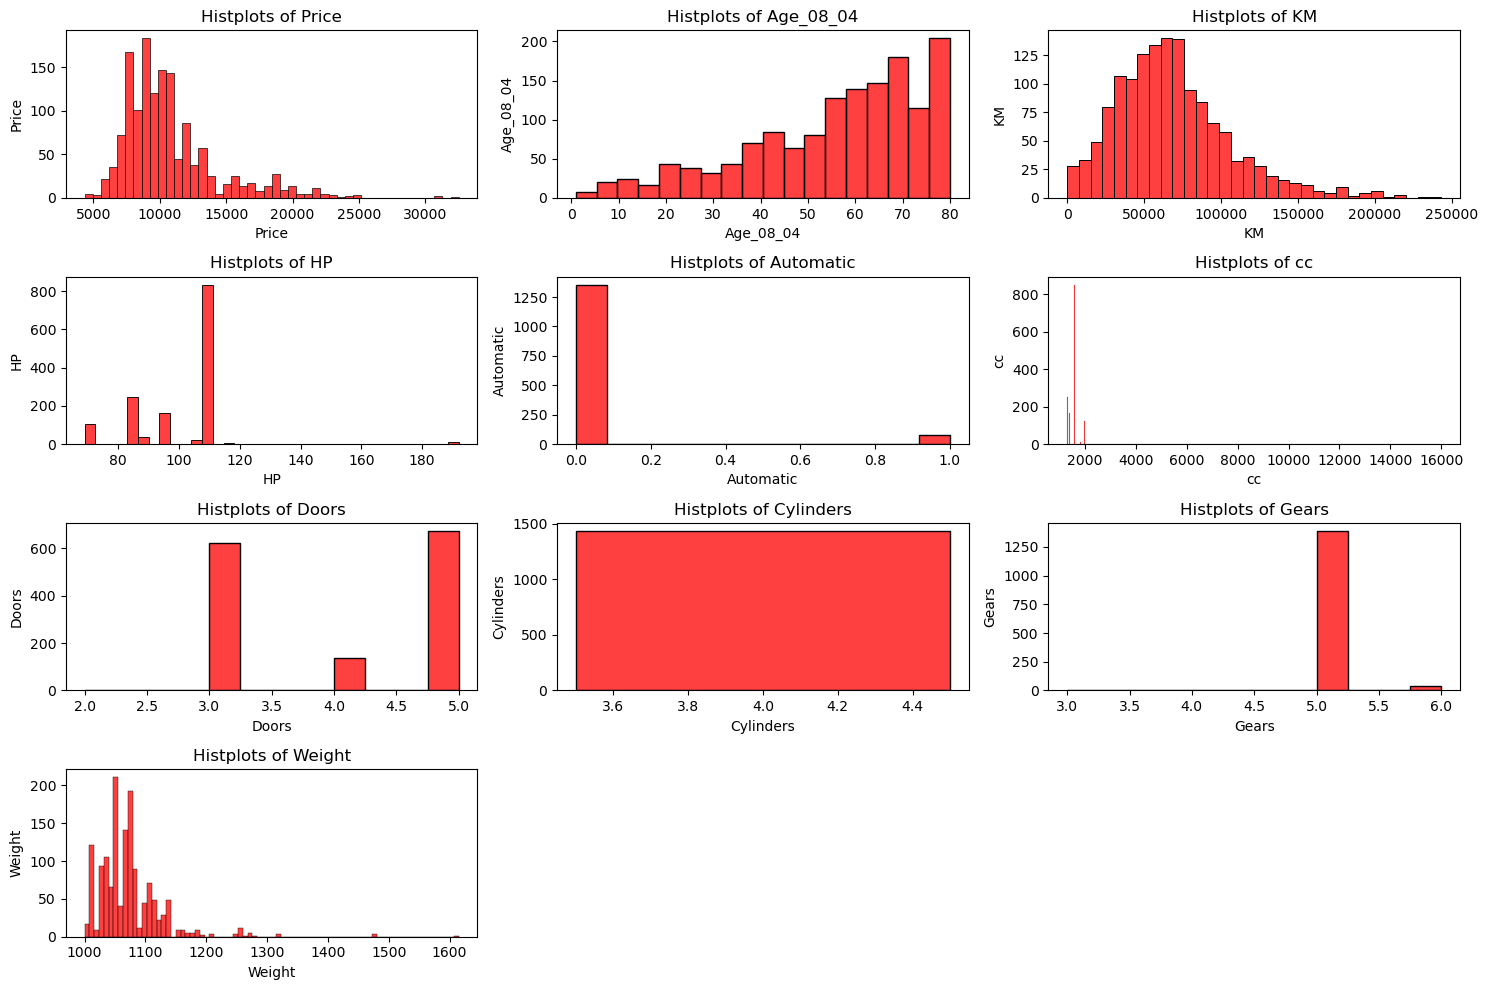

In [11]:
# Ploting the hist plots to detect the outliers
plt.figure(figsize=(15,10))
index=1
for col in num_col:
    plt.subplot(4,3,index)
    sns.histplot(x=df[col],color='red')
    plt.title(f'Histplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

From above hisplot we can guess the distribution of the data

* Columns like Price, KM, Weights are probably left skewed.
* Columns like Age, Doors are right skewed.
* cc, Cylinder column has only data points 2000 and 4 respectively.

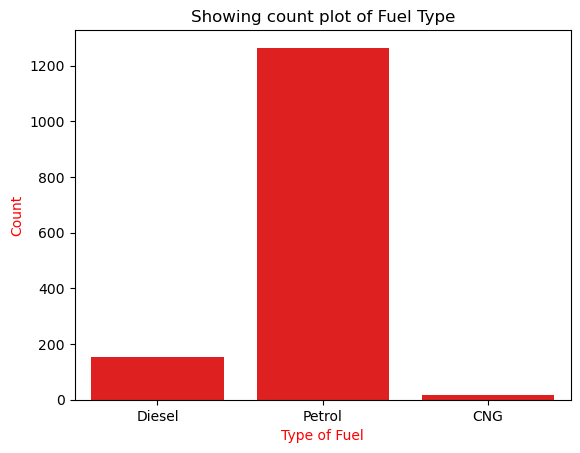

In [12]:
#Lets work with the categorical column
sns.countplot(x=df['Fuel_Type'], color='red')
plt.title("Showing count plot of Fuel Type")
plt.xlabel("Type of Fuel",color='red')
plt.ylabel("Count",color='red')
plt.show()

C:\Users\ShShet\AppData\Local\Temp\ipykernel_13916\2535757621.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[col],color='red', fill=True)


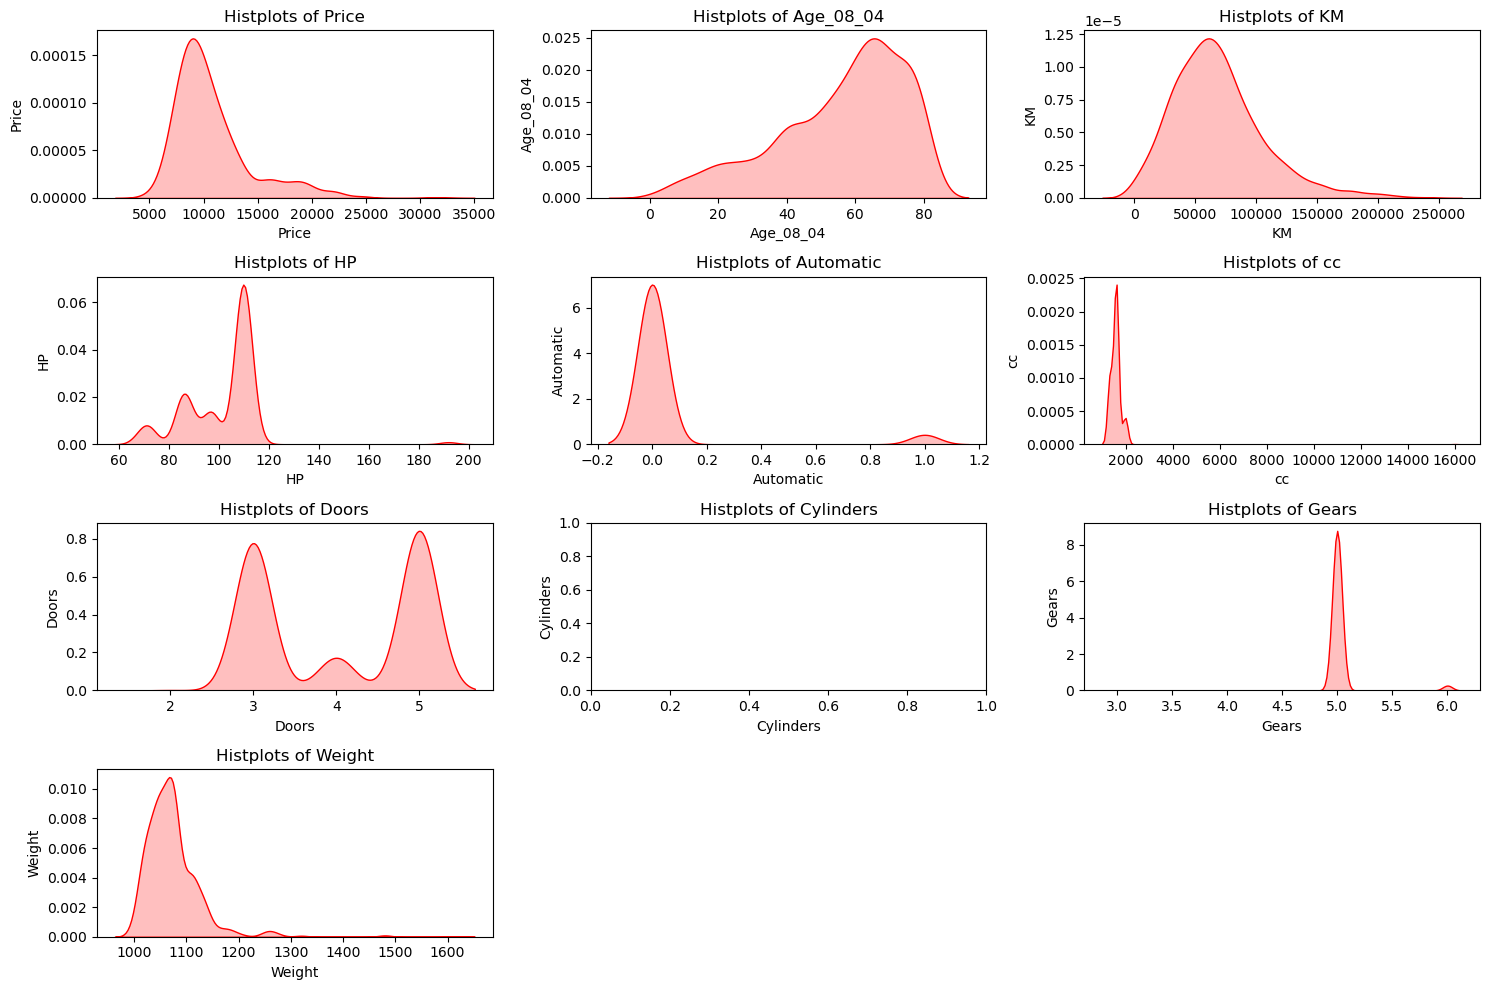

In [13]:
# Ploting the hist plots to detect the outliers
plt.figure(figsize=(15,10))
index=1
for col in num_col:
    plt.subplot(4,3,index)
    sns.kdeplot(x=df[col],color='red', fill=True)
    plt.title(f'Histplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

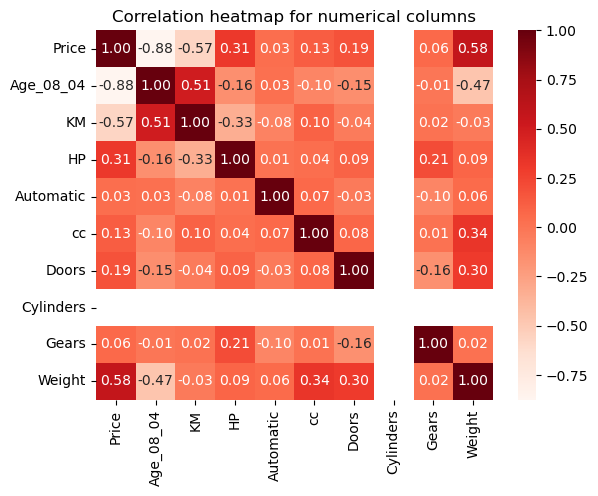

In [14]:
# let's plot correlation matrix for numerical columns
z=df.corr(numeric_only=True)
sns.heatmap((z), cmap='Reds', cbar="True", annot=True,fmt='.2f')
plt.title("Correlation heatmap for numerical columns")
plt.show()

* From above heatmap we can see that most of the columns are not highly correlated
* We must note that Price and Age of the car is highly negatively correlated

In [15]:
df.drop("Cylinders", axis=1, inplace=True)                 #removing Cylinder column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [16]:
## We can convert our catrgoical column into numerical column to do our future analysis 
obj_col

['Fuel_Type']

In [17]:
df.Fuel_Type.unique()  

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [18]:
# we will convert this using dictionary function.
# define the dictionary
d = {'Diesel':0,'Petrol':1, 'CNG':2}
# map the above defined dictionary into the column
df['Fuel_Type'] = df['Fuel_Type'].map(d)
df['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Gears      1436 non-null   int64
 9   Weight     1436 non-null   int64
dtypes: int64(10)
memory usage: 112.3 KB


We can see that in the above info that Fuel_Type is now converted into numerical column.

#### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [20]:
# Feature extraction
x = df.drop('Price', axis=1)   
y = df['Price']
x.shape, y.shape

((1436, 9), (1436,))

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1148, 9), (288, 9), (1148,), (288,))

#### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [22]:
# Building Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [23]:
#Interpret the coefficients of the model
coefficients = LR.coef_
intercept = LR.intercept_
# print(coefficients, intercept)
print("Coefficient of the variables are : ",coefficients)
print("Intercept is : ",intercept)

Coefficient of the variables are :  [-1.20405708e+02 -1.97355717e-02  2.86418249e+02  2.39916730e+01
  3.22515547e+02 -9.09032657e-02 -3.99586776e+00  6.43311361e+02
  2.10150910e+01]
Intercept is :  -9493.697867295436


In [24]:
#Evaluation of Multiple Linear Regression Model.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

print("Training r2 score of the MLR model is : ", r2_score(y_train, LR.predict(x_train)))
print("Testing r2 score of the MLR model is : ", r2_score(y_test, LR.predict(x_test)))

Training r2 score of the MLR model is :  0.8661569648857386
Testing r2 score of the MLR model is :  0.8498277844722373


In [25]:
print("Training mean absolute error of the MLR model is : ", mae(y_train, LR.predict(x_train)))
print("Testing mean absolute error of the MLR model is : ", mae(y_test, LR.predict(x_test)))

Training mean absolute error of the MLR model is :  983.8702683373652
Testing mean absolute error of the MLR model is :  993.607660610101


Since tere is a small difference between training and testing scores we can say our model do not overfit or underfit. We can say it's a good model.

#### 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset

In [26]:
# Buiding model using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
print("Training r2 score of the Random Forest Regressor model is : ", r2_score(y_train, RFR.predict(x_train)))
print("Testing r2 score of the Random Forest Regressor model is : ", r2_score(y_test, RFR.predict(x_test)))

Training r2 score of the Random Forest Regressor model is :  0.9862459747410025
Testing r2 score of the Random Forest Regressor model is :  0.9113468250637926


In [28]:
print("Training mean absolute error of the Random Forest Regressor model is : ", mae(y_train, RFR.predict(x_train)))
print("Testing mean absolute error of the Random Forest Regressor model is : ", mae(y_test, RFR.predict(x_test)))

Training mean absolute error of the Random Forest Regressor model is :  314.97916376306614
Testing mean absolute error of the Random Forest Regressor model is :  837.9896180555556


In [29]:
from sklearn.metrics import mean_squared_error as mse
print("Training mean squared error of the Random Forest Regressor model is : ", mse(y_train, RFR.predict(x_train)))
print("Testing mean squared error of the Random Forest Regressor model is : ", mse(y_test, RFR.predict(x_test)))

Training mean squared error of the Random Forest Regressor model is :  180088.33030923345
Testing mean squared error of the Random Forest Regressor model is :  1182880.5934975694


We can see here our Random Forest Model is able to generalize the training data well but not that good for the unseen data so this model is pruned to get overfitted.

In [30]:
# Buiding model using XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
print("Training r2 score of the XGBRegressor model is : ", r2_score(y_train, xgb.predict(x_train)))
print("Testing r2 score of the XGBRegressor model is : ", r2_score(y_test, xgb.predict(x_test)))

Training r2 score of the XGBRegressor model is :  0.9940303564071655
Testing r2 score of the XGBRegressor model is :  0.9131289720535278


In [32]:
print("Training mean absolute error of the XGBRegressor model is : ", mae(y_train, xgb.predict(x_train)))
print("Testing mean absolute error of the XGBRegressor model is : ", mae(y_test, xgb.predict(x_test)))

Training mean absolute error of the XGBRegressor model is :  203.16964030515027
Testing mean absolute error of the XGBRegressor model is :  861.8024529351128


In [33]:
print("Training mean squared error of the XGBRegressor model is : ", mse(y_train, xgb.predict(x_train)))
print("Testing mean squared error of the XGBRegressor model is : ", mse(y_test, xgb.predict(x_test)))

Training mean squared error of the XGBRegressor model is :  78163.8321557344
Testing mean squared error of the XGBRegressor model is :  1159101.4741908843


In [34]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [35]:
print("Training r2 score of the SVM model is : ", r2_score(y_train, svr.predict(x_train)))          #predicting training score
print("Testing r2 score of the SVM model is : ", r2_score(y_test, svr.predict(x_test)))             #predicting testing score

Training r2 score of the SVM model is :  -0.03412379014473199
Testing r2 score of the SVM model is :  -0.017413705119628142


In [36]:
print("Training mean absolute error of the SVM model is : ", mae(y_train, svr.predict(x_train)))     #predicting training score
print("Testing mean absolute error of the SVM model is : ", mae(y_test, svr.predict(x_test)))        #predicting testing score

Training mean absolute error of the SVM model is :  2438.5768924972126
Testing mean absolute error of the SVM model is :  2416.9023367261343


In [37]:
print("Training mean absolute error of the SVM model is : ", mse(y_train, svr.predict(x_train)))      #predicting training score
print("Testing mean absolute error of the SVM model is : ", mse(y_test, svr.predict(x_test)))         #predicting testing score

Training mean absolute error of the SVM model is :  13540299.889909843
Testing mean absolute error of the SVM model is :  13575136.23409946


As we can observe that we got negative value for r2_score so we can say that our model is performing so bad that its not even able to generalize the data at all.

After observing all the above three models we can say for this example the best type of algoritm can be Linear based Models, Tree Based Models and for this particular example we should avoid Suppport Vector Machines (SVM)

#### 5. Applying Lasso and Ridge methods on the model.

In [38]:
from sklearn.linear_model import Lasso, Ridge

#applying LASSO 
lasso = Lasso(alpha = 30)     #alpha = 30 is a constant 
lasso.fit(x_train, y_train)   # fitting the model

Lasso(alpha=30)

In [39]:
print("Training r2_score of Lasso Model is : ", r2_score(y_train, lasso.predict(x_train)))         #predicting training score
print("Testing r2_score of Lasso Model is : ", r2_score(y_test, lasso.predict(x_test)))   

Training r2_score of Lasso Model is :  0.864431588036809
Testing r2_score of Lasso Model is :  0.8503582085353598


In [40]:
print("Training Mean Aboslute Error of Lasso Model is : ", mae(y_train, lasso.predict(x_train)))    #predicting training score
print("Testing Mean Absolute Error of Lasso Model is : ", mae(y_test, lasso.predict(x_test)))       #predicting testing score

Training Mean Aboslute Error of Lasso Model is :  992.3082945507493
Testing Mean Absolute Error of Lasso Model is :  998.4061268361602


In [41]:
print("Training Mean Squared Error of Lasso Model is : ", mse(y_train, lasso.predict(x_train)))      #predicting training score
print("Testing Mean Squared Error of Lasso Model is : ", mse(y_test, lasso.predict(x_test)))         #predicting testing score

Training Mean Squared Error of Lasso Model is :  1775065.00776231
Testing Mean Squared Error of Lasso Model is :  1996638.8257059483


In [42]:
#Applying RIDGE
ridge = Ridge(alpha = 30)
ridge.fit(x_train, y_train)

Ridge(alpha=30)

In [43]:
print("Training r2_score of Ridge Model is : ", r2_score(y_train, ridge.predict(x_train)))          #predicting training score
print("Testing r2_score of Ridge Model is : ", r2_score(y_test, ridge.predict(x_test)))             #predicting testing score

Training r2_score of Ridge Model is :  0.8658675210354263
Testing r2_score of Ridge Model is :  0.8502913488860446


In [44]:
print("Training Mean Aboslute Error of Ridge Model is : ", mae(y_train, ridge.predict(x_train)))     #predicting training score
print("Testing Mean Absolute Error of Ridge Model is : ", mae(y_test, ridge.predict(x_test)))        #predicting testing score

Training Mean Aboslute Error of Ridge Model is :  984.5751483262255
Testing Mean Absolute Error of Ridge Model is :  993.53959878511


In [45]:
print("Training Mean Squared Error of Ridge Model is : ", mse(y_train, ridge.predict(x_train)))      #predicting training score
print("Testing Mean Squared Error of Ridge Model is : ", mse(y_test, ridge.predict(x_test)))         #predicting testing score

Training Mean Squared Error of Ridge Model is :  1756263.618984303
Testing Mean Squared Error of Ridge Model is :  1997530.9198889257


We can observe that both Lasso and Ridge models are performing almost the same.

Interview Questions:


1.What is Normalization & Standardization and how is it helpful?
Answer

* Normalization:
* It is a process of scaling data to a fixed range, typically [0, 1] or [-1, 1]. It rescales the values of each feature to ensure that they contribute equally to the analysis, regardlees of their original magnitude.

  Formula used : x = (x - min(x))/(max(x)-min(x))

* Usually used for KNN and K-Means (distance based algorithm)

* Standardization:
* It transforms the data to have a mean of 0 and a standard deviation of 1, centering the distribution to normalize the spead of data, giving it unit variance.
 Formula used : z = (x-mean)/σ

* Used in models like Linear Regression, Logestic Regression, DBSCAN, K-Means

2. What techniques can be used to address multicollinearity in multiple linear regression?

   
Answer Multicollinearily typically occurs when two or more independent variables are highly correlated to each other, it makes the model difficult to analyse the effects of individual variables.

Ways to handle this include

* Remove highly correlated columns
* Dimentionality reduction
* Regularization Techniques
* Centering and Standardization
* Add or collect more data
* Remove or combine interaction terms